In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Ingestion & Quality Profiling

In [3]:
df = pd.read_csv("C:\\Users\\Rishav\\Downloads\\Dataset-Pyhton-001\\Dataset\\car_prices.csv")

In [4]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


### Understanding the Data Structure

In [6]:
df.shape

(558837, 16)

In [7]:
df.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
saledate         object
dtype: object

### Missing & Anomaly Detection

In [9]:
null_counts = df.isnull().sum()
null_percent = (null_counts / len(df)) * 100

In [10]:
missing_df = pd.DataFrame({
    "Missing_Count": null_counts,
    "Missing_Percentage": null_percent
}).sort_values(by="Missing_Percentage", ascending=False)

missing_df

,Missing_Count,Missing_Percentage
transmission,65352,11.694287
body,13195,2.361154
condition,11820,2.115107
trim,10651,1.905922
model,10399,1.860829
make,10301,1.843292
color,749,0.134028
interior,749,0.134028
odometer,94,0.016821
mmr,38,0.006800


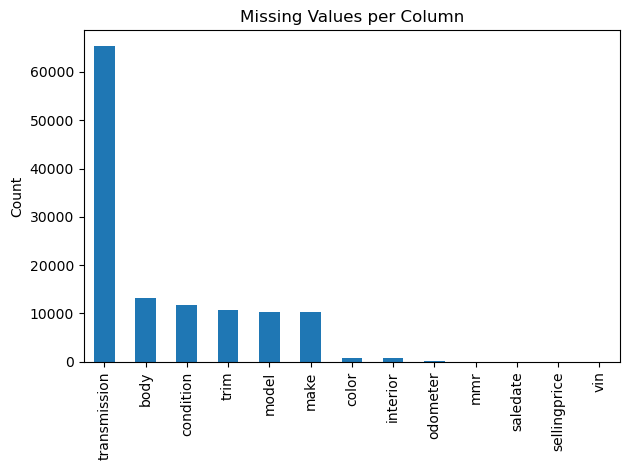

In [11]:
missing_df[missing_df["Missing_Count"] > 0]["Missing_Count"].plot(kind="bar")
plt.title("Missing Values per Column")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### Resolving Null Values

##### Categorical columns → Impute with "Unknown"

In [12]:
categorical_cols = df.select_dtypes(include="object").columns

df[categorical_cols] = df[categorical_cols].fillna("Unknown")

##### Numerical columns → Median imputation

In [13]:
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns

for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

### Duplicate Detection and Removal

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df = df.drop_duplicates()

In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
df.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [18]:
##The dataset was loaded, inspected for structure and types, missing values were quantified and visualized, nulls were handled using datatype-specific strategies, and duplicate records were identified and removed to ensure data quality.

### Data frames Queries

##### 2.1 Calculate the average, minimum, and maximum car price

In [23]:
avg_price = df['sellingprice'].mean()
avg_price

np.float64(13611.326356343621)

In [24]:
min_price = df['sellingprice'].min()
min_price

1.0

In [25]:
max_price = df['sellingprice'].max()
max_price

230000.0

In [26]:
#Calculated the average, minimum, and maximum car price using the sellingprice column, which represents the actual transaction value of the vehicle.

##### 2.2 List all unique colors of cars

In [27]:
df['color'].unique()

array(['white', 'gray', 'black', 'red', 'silver', 'blue', 'brown',
       'beige', 'purple', 'burgundy', '—', 'gold', 'yellow', 'green',
       'charcoal', 'Unknown', 'orange', 'off-white', 'turquoise', 'pink',
       'lime', '4802', '9410', '1167', '2172', '14872', '12655', '15719',
       '6388', '16633', '11034', '2711', '6864', '339', '18384', '9887',
       '9837', '20379', '20627', '721', '6158', '2817', '5705', '18561',
       '2846', '9562', '5001'], dtype=object)

In [29]:
df['color'].value_counts()

color
black        110970
white        106673
silver        83389
gray          82857
blue          51139
red           43569
—             24685
green         11382
gold          11342
beige          9222
burgundy       8972
brown          6717
orange         2078
purple         1561
off-white      1449
yellow         1285
Unknown         749
charcoal        479
turquoise       236
pink             42
lime             15
4802              1
9410              1
1167              1
2172              1
14872             1
12655             1
15719             1
6388              1
16633             1
11034             1
2711              1
6864              1
339               1
18384             1
9887              1
9837              1
20379             1
20627             1
721               1
6158              1
2817              1
5705              1
18561             1
2846              1
9562              1
5001              1
Name: count, dtype: int64

##### 2.3 Number of unique car brands and car models

In [30]:
num_brands = df['make'].nunique()
num_models = df['model'].nunique()

num_brands, num_models

(97, 974)

##### 2.4 Car information with selling price > $165,000

In [32]:
high_price_cars = df[df['sellingprice'] > 165000]
high_price_cars

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
125095,2012,Rolls-Royce,Ghost,Base,Sedan,automatic,sca664s58cux50727,fl,45.0,14316.0,black,beige,braman motorcars,154000.0,169500.0,Wed Jan 14 2015 01:40:00 GMT-0800 (PST)
344905,2014,Ford,Escape,Titanium,SUV,automatic,1fmcu9j98eua23833,mo,43.0,27802.0,green,tan,ford-lincoln dealer program,22800.0,230000.0,Wed Feb 25 2015 02:00:00 GMT-0800 (PST)
446949,2015,Mercedes-Benz,S-Class,S65 AMG,Sedan,automatic,wddug7kb2fa102347,ca,41.0,5277.0,white,white,mercedes-benz usa,170000.0,173000.0,Thu May 21 2015 05:00:00 GMT-0700 (PDT)
538347,2012,Rolls-Royce,Ghost,Base,sedan,automatic,sca664s59cux50803,ca,44.0,5215.0,white,tan,financial services remarketing (bmw int),166000.0,167000.0,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
545523,2013,Rolls-Royce,Ghost,Base,sedan,automatic,sca664s52dux52152,fl,42.0,7852.0,white,beige,flag/landrover southpointe,178000.0,171500.0,Wed Jun 17 2015 03:05:00 GMT-0700 (PDT)
548169,2011,Ferrari,458 Italia,Base,coupe,automatic,zff67nfa1b0178698,fl,46.0,12116.0,red,black,platinum motor cars,182000.0,183000.0,Wed Jun 17 2015 03:40:00 GMT-0700 (PDT)
557570,2012,Rolls-Royce,Ghost,EWB,sedan,automatic,sca664l50cux65625,ca,36.0,11832.0,white,black,bentley scottsdale,164000.0,169000.0,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)


##### 2.5 Top 5 most frequently sold car models

In [35]:
df['model'].value_counts().head(5)

model
Altima    19349
F-150     14479
Fusion    12946
Camry     12545
Escape    11861
Name: count, dtype: int64

##### 2.6 Average selling price of cars by brand (make)

In [36]:
avg_price_by_make = df.groupby('make')['sellingprice'].mean().sort_values(ascending=False)
avg_price_by_make

make
Rolls-Royce    153488.235294
Ferrari        127210.526316
Lamborghini    112625.000000
Bentley         74367.672414
airstream       71000.000000
                   ...      
dodge tk          550.000000
Geo               528.947368
dot               500.000000
ford truck        483.333333
Daewoo            400.000000
Name: sellingprice, Length: 97, dtype: float64

##### 2.7 Minimum selling price of cars for each interior

In [37]:
min_price_by_interior = df.groupby('interior')['sellingprice'].min()
min_price_by_interior

interior
Unknown       225.0
beige         100.0
black           1.0
blue          150.0
brown         200.0
burgundy      175.0
gold          250.0
gray            1.0
green         100.0
off-white     900.0
orange       1200.0
purple        200.0
red           200.0
silver        150.0
tan           100.0
white         350.0
yellow       3100.0
—             150.0
Name: sellingprice, dtype: float64

##### 2.8 Highest odometer reading per year (descending order)

In [38]:
highest_odo_per_year = (
    df.groupby('year')['odometer']
      .max()
      .sort_values(ascending=False)
)

highest_odo_per_year

year
1997    999999.0
1996    999999.0
2014    999999.0
2013    999999.0
1998    999999.0
1999    999999.0
1993    999999.0
2010    999999.0
2009    999999.0
2012    999999.0
2008    999999.0
2007    999999.0
2005    999999.0
2006    999999.0
2004    999999.0
2003    999999.0
2002    999999.0
2001    999999.0
2011    999999.0
2000    462579.0
1995    396793.0
1992    379307.0
1994    356402.0
1991    274149.0
1986    273327.0
1990    265498.0
1988    241751.0
1987    230946.0
1989    218052.0
1984    170799.0
1985    121644.0
2015    100454.0
1982     85738.0
1983     42697.0
Name: odometer, dtype: float64

##### 2.9 Create a new column for car age (current year = 2025)

In [42]:
df['car_age'] = 2025 - df['year']
df[['year', 'car_age']].head()

,year,car_age
0,2015,10
1,2015,10
2,2014,11
3,2015,10
4,2014,11


##### 2.10 Number of cars with condition ≥ 48 and odometer > 90,000

In [44]:
count_cars = df[
    (df['condition'] >= 48) & 
    (df['odometer'] > 90000)
].shape[0]

count_cars

746

##### 2.11 State with consistently higher prices for newer cars (year > 2013)

In [45]:
newer_cars = df[df['year'] > 2013]

avg_price_by_state = (
    newer_cars.groupby('state')['sellingprice']
    .mean()
    .sort_values(ascending=False)
)

avg_price_by_state.head()

state
oh    28020.221053
ab    25204.255319
nj    24237.063973
on    22962.560386
qc    22722.938144
Name: sellingprice, dtype: float64

##### 2.12 Best value-for-money brands (Top 20% condition, lowest avg price)

###### Step 1: Identify top 20% condition threshold

In [46]:
condition_threshold = df['condition'].quantile(0.80)

###### Step 2: Filter excellent-condition cars

In [47]:
excellent_cars = df[df['condition'] >= condition_threshold]

###### Step 3: Lowest average price by make

In [48]:
value_for_money = (
    excellent_cars.groupby('make')['sellingprice']
    .mean()
    .sort_values()
)

value_for_money.head(10)

make
Isuzu         1125.000000
Oldsmobile    1910.000000
honda         4233.333333
Saturn        5700.406504
subaru        6200.000000
chrysler      6225.000000
smart         6835.759494
mazda         7275.000000
Pontiac       7686.824324
Saab          7711.111111
Name: sellingprice, dtype: float64

### Data Visualization and Insights

##### 3.1 Correlation of all numerical features

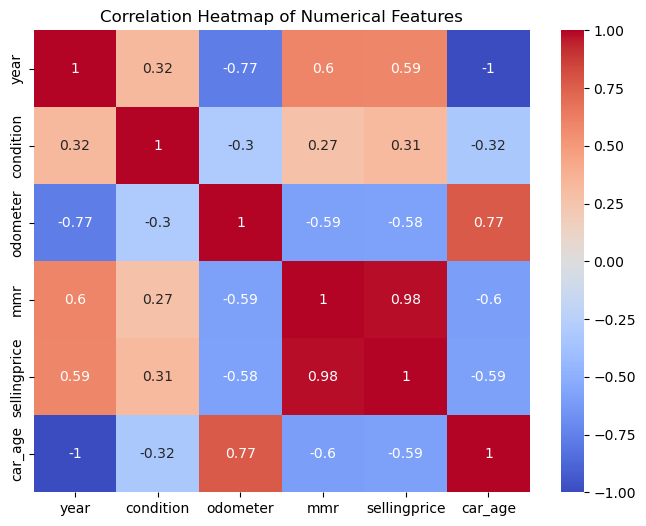

In [50]:
num_cols = df.select_dtypes(include=['int64', 'float64'])

corr_matrix = num_cols.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [51]:
# sellingprice has negative correlation with odometer

# sellingprice has positive correlation with condition and year

# Higher mileage → lower price (expected depreciation behavior)

##### 3.2 Average selling price by year

In [52]:
# Which plot? → Bar plot
# Why bar plot? -> Year is a discrete categorical variable, and we are plotting an aggregated metric (average).

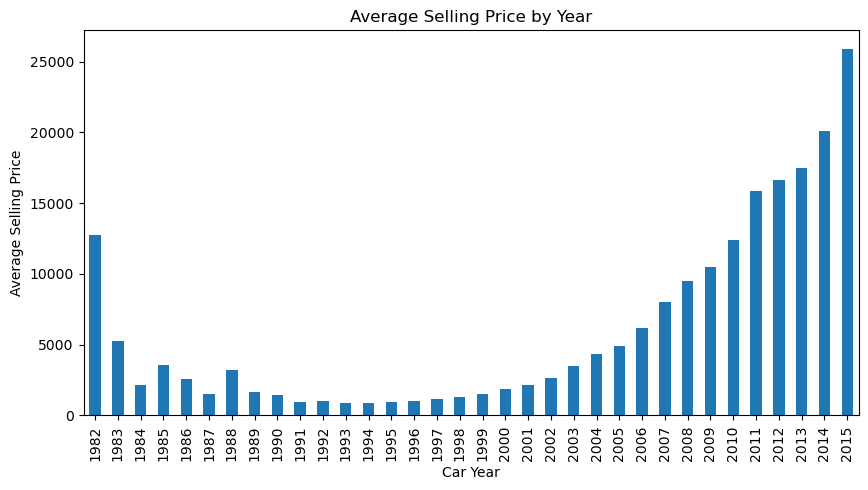

In [53]:
avg_price_year = df.groupby('year')['sellingprice'].mean()

avg_price_year.plot(kind='bar', figsize=(10,5))
plt.xlabel("Car Year")
plt.ylabel("Average Selling Price")
plt.title("Average Selling Price by Year")
plt.show()

In [54]:
# Newer cars have higher average selling prices

# Noticeable price drop as vehicle age increases

# Confirms depreciation trend

##### 3.3 Average selling price by odometer

In [55]:
# Correct plot → Line plot (trend) or scatter (raw)

# Since this is aggregated, line plot is better.

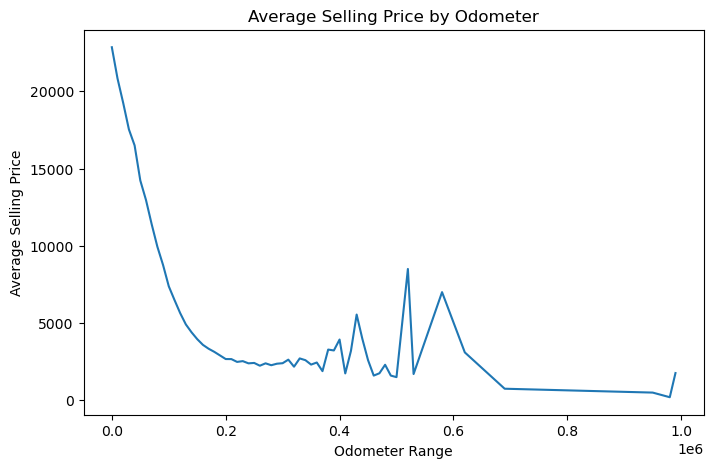

In [56]:
df['odometer_bin'] = (df['odometer'] // 10000) * 10000

avg_price_odo = df.groupby('odometer_bin')['sellingprice'].mean()

avg_price_odo.plot(figsize=(8,5))
plt.xlabel("Odometer Range")
plt.ylabel("Average Selling Price")
plt.title("Average Selling Price by Odometer")
plt.show()

In [57]:
# Clear downward trend

# As mileage increases, resale value decreases

# Sharp drop after higher mileage ranges

##### 3.4 Number of cars sold in each state

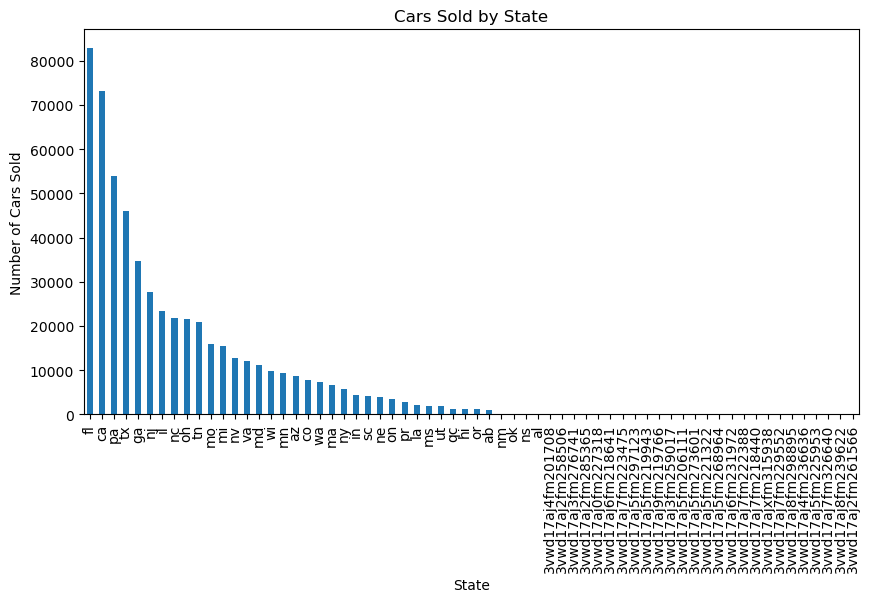

In [58]:
state_sales = df['state'].value_counts()

state_sales.plot(kind='bar', figsize=(10,5))
plt.xlabel("State")
plt.ylabel("Number of Cars Sold")
plt.title("Cars Sold by State")
plt.show()

##### Top 3 states

In [59]:
state_sales.head(3)

state
fl    82945
ca    73148
pa    53907
Name: count, dtype: int64

In [60]:
# The top 3 states dominate car sales volume

# Indicates larger markets or higher auction activity

##### 3.5 Average selling price by condition ranges (size = 5)

In [63]:
df['condition_range_5'] = pd.cut(
    df['condition'],
    bins=range(0, 55, 5)
)

avg_price_condition = (
    df.groupby('condition_range_5')['sellingprice']
    .mean()
)

C:\Users\Rishav\AppData\Local\Temp\ipykernel_19592\2664990043.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('condition_range_5')['sellingprice']


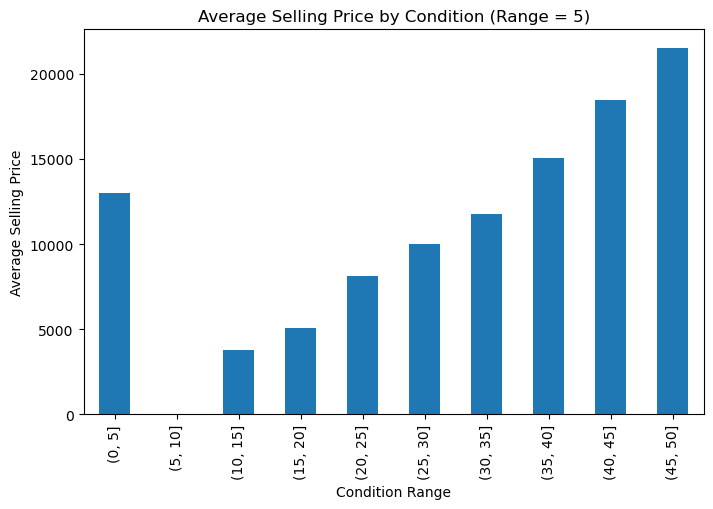

In [64]:
avg_price_condition.plot(kind='bar', figsize=(8,5))
plt.xlabel("Condition Range")
plt.ylabel("Average Selling Price")
plt.title("Average Selling Price by Condition (Range = 5)")
plt.show()

In [65]:
# Higher condition score → higher selling price

# Strong positive relationship

# Condition is a key pricing driver

##### 3.6 Number of cars sold by condition ranges (size = 10)

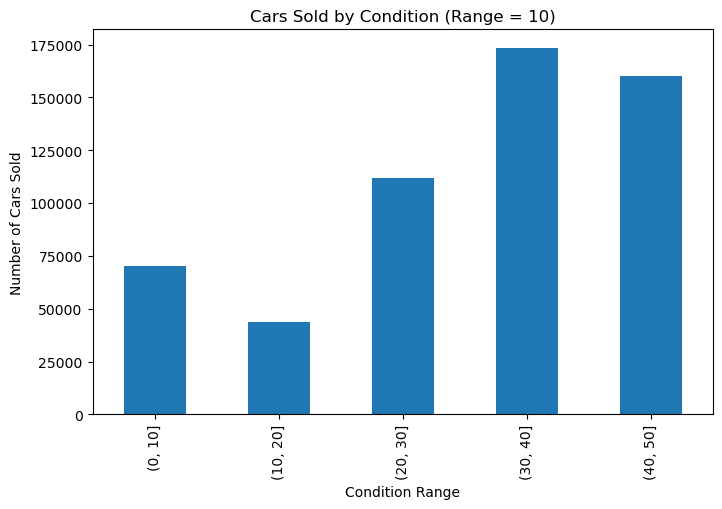

In [66]:
df['condition_range_10'] = pd.cut(
    df['condition'],
    bins=range(0, 55, 10)
)

count_by_condition = df['condition_range_10'].value_counts().sort_index()

count_by_condition.plot(kind='bar', figsize=(8,5))
plt.xlabel("Condition Range")
plt.ylabel("Number of Cars Sold")
plt.title("Cars Sold by Condition (Range = 10)")
plt.show()

In [67]:
# Most cars fall into mid-to-high condition ranges

# Very few extremely low-condition vehicles are sold

# Suggests quality threshold in the market

##### 3.7 Box plot: selling price by color

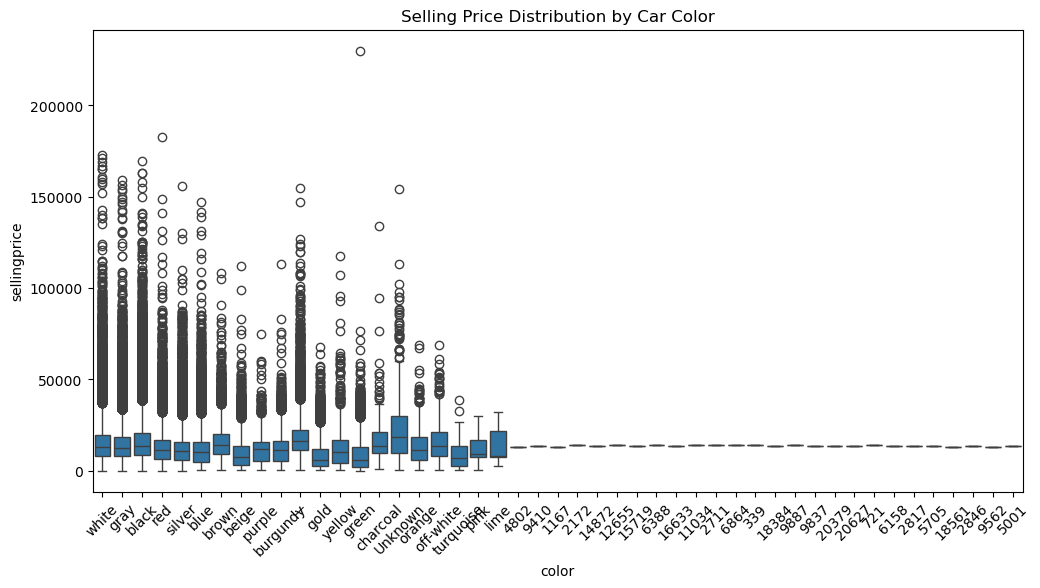

In [69]:
plt.figure(figsize=(12,6))
sns.boxplot(x='color', y='sellingprice', data=df)
plt.xticks(rotation=45)
plt.title("Selling Price Distribution by Car Color")
plt.show()

In [70]:
# Some colors show higher median prices

# Presence of extreme outliers, especially luxury vehicles

##### Replot after removing Outliers

In [71]:
Q1 = df['sellingprice'].quantile(0.25)
Q3 = df['sellingprice'].quantile(0.75)
IQR = Q3 - Q1

In [72]:
df_no_outliers = df[
    (df['sellingprice'] >= Q1 - 1.5 * IQR) &
    (df['sellingprice'] <= Q3 + 1.5 * IQR)
]

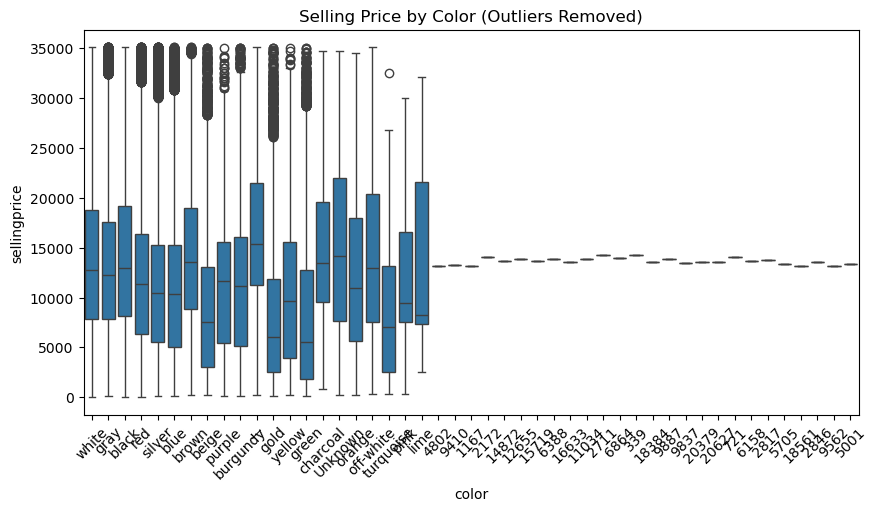

In [73]:
plt.figure(figsize=(10,5))
sns.boxplot(x='color', y='sellingprice', data=df_no_outliers)
plt.xticks(rotation=45)
plt.title("Selling Price by Color (Outliers Removed)")
plt.show()

In [74]:
# Outlier removal improves visibility of price distribution

# Core pricing differences become clearer after cleaning